# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [197]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.
pd.set_option('display.max_columns', None)
import glob
import datetime
import os
from io import StringIO
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

In [198]:
DATA_FOLDER = '../../ADA2017-Tutorials/02 - Intro to Pandas/Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [199]:
all_sl_files = glob.glob(DATA_FOLDER + r'/ebola/sl_data/*.csv')

frames = []

for f in all_sl_files:
    data = None
    
    with open(f) as file:
        data = StringIO('\n'.join([l for l in file if '%' not in l]))

    new_frame = pd.read_csv(data,
                           parse_dates=['date'], thousands=',',
                           na_values=['Nr', '-', 'NR'])
    frames.append(new_frame)
    
sl = pd.concat(frames)
sl_newcases = ['new_suspected', 'new_probable', 'new_confirmed', 'new_positive']
sl_deaths = ['death_suspected', 'death_probable', 'death_confirmed',
       'etc_new_deaths', 'positive_corpse']

In [200]:
def compute_daily_averages(df, variable_column_name, variables_to_average, date_column_name):
    df_filtered = df[(df[variable_column_name].isin(variables_to_average))]
    di = pd.DatetimeIndex(df_filtered[date_column_name])
    g = df_filtered.groupby([di.month, di.year])
    ndays = g[date_column_name].nunique()
    
    avg_df = g.sum().div(ndays, axis='rows')
    return avg_df.dropna(axis=1, how='all')

In [201]:
sl.dtypes

34 Military Hospital             float64
Bo                               float64
Bo EMC                           float64
Bombali                          float64
Bonthe                           float64
Hastings-F/Town                  float64
Kailahun                         float64
Kambia                           float64
Kenema                           float64
Kenema (IFRC)                    float64
Kenema (KGH)                     float64
Koinadugu                        float64
Kono                             float64
Moyamba                          float64
National                         float64
Police training School           float64
Police traning School            float64
Port Loko                        float64
Pujehun                          float64
Tonkolili                        float64
Unnamed: 18                      float64
Western area                     float64
Western area combined            float64
Western area rural               float64
Western area urb

In [202]:
compute_daily_averages(sl, 'variable', sl_newcases, 'date')

,,Bo,Bombali,Bonthe,Kailahun,Kambia,Kenema,Koinadugu,Kono,Moyamba,National,Port Loko,Pujehun,Tonkolili,Western area,Western area rural,Western area urban
date,date,,,,,,,,,,,,,,,,
8,2014,1.800000,2.150000,0.000000,5.100000,0.000000,8.700000,0.250000,0.000000,0.300000,25.150000,3.150000,0.200000,0.850000,NaN,1.650000,2.500000
9,2014,2.000000,6.724138,0.068966,2.448276,0.620690,3.931034,0.000000,0.965517,1.965517,40.689655,8.275862,0.482759,2.482759,NaN,5.241379,7.620690
10,2014,4.178571,13.357143,0.071429,0.892857,0.714286,4.321429,1.214286,1.500000,1.750000,86.107143,8.964286,0.535714,5.714286,11.464286,7.892857,9.357143
11,2014,3.380952,11.428571,0.190476,0.380952,1.476190,0.619048,2.476190,3.190476,2.000000,112.714286,12.428571,0.285714,5.000000,NaN,11.809524,23.904762
12,2014,1.400000,4.800000,0.000000,0.000000,1.200000,0.000000,0.200000,1.400000,0.600000,59.200000,14.200000,0.000000,0.600000,NaN,5.200000,11.400000


In [203]:
all_files = glob.glob(DATA_FOLDER + r'/ebola/liberia_data/*.csv')

frames = []

for f in all_files:
    new_frame = pd.read_csv(f)
    frames.append(new_frame)
    
lib = pd.concat(frames)
lib_deaths = ['Total death/s in confirmed, probable, suspected cases']
lib_newcases = ['Newly reported contacts']

In [204]:
lib.dtypes

Bomi County           float64
Bong County           float64
Date                   object
Gbarpolu County       float64
Grand Bassa           float64
Grand Cape Mount      float64
Grand Gedeh           float64
Grand Kru             float64
Lofa County           float64
Margibi County        float64
Maryland County       float64
Montserrado County    float64
National              float64
Nimba County          float64
River Gee County      float64
RiverCess County      float64
Sinoe County          float64
Unnamed: 18           float64
Variable               object
dtype: object

In [205]:
compute_daily_averages(lib, 'Variable', lib_newcases, 'Date')

,,Bomi County,Bong County,Gbarpolu County,Grand Bassa,Grand Cape Mount,Grand Gedeh,Grand Kru,Lofa County,Margibi County,Maryland County,Montserrado County,National,Nimba County,River Gee County,RiverCess County,Sinoe County
Date,Date,,,,,,,,,,,,,,,,
6,2014,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,9.285714,0.000000,0.000000,17.857143,27.142857,0.000000,0.000000,0.000000,0.000000
7,2014,0.000000,2.818182,0.00,0.000000,0.000000,0.0,0.000000,10.909091,0.000000,0.000000,7.272727,21.000000,0.000000,0.000000,0.000000,0.000000
8,2014,1.222222,19.111111,NaN,1.111111,0.000000,0.0,NaN,12.000000,10.111111,NaN,69.777778,129.222222,14.111111,1.111111,0.666667,0.000000
9,2014,19.416667,7.291667,0.00,4.916667,0.458333,0.0,0.833333,9.000000,37.125000,0.000000,149.416667,246.291667,16.916667,0.458333,0.000000,0.458333
10,2014,5.840000,8.400000,0.24,1.320000,6.560000,0.4,0.840000,4.560000,12.280000,0.000000,160.840000,205.640000,2.120000,0.000000,0.920000,1.320000
11,2014,0.733333,1.866667,0.00,3.200000,16.000000,0.0,0.333333,2.600000,13.133333,2.266667,100.933333,139.533333,0.000000,0.000000,0.000000,4.533333
12,2014,0.000000,1.777778,0.00,1.222222,3.111111,0.0,0.000000,0.000000,4.222222,0.000000,37.444444,48.000000,0.000000,0.000000,0.000000,0.222222


In [206]:
compute_daily_averages(lib, 'Variable', lib_deaths, 'Date')

,,Bomi County,Bong County,Gbarpolu County,Grand Bassa,Grand Cape Mount,Grand Gedeh,Grand Kru,Lofa County,Margibi County,Maryland County,Montserrado County,National,Nimba County,River Gee County,RiverCess County,Sinoe County
Date,Date,,,,,,,,,,,,,,,,
6,2014,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,17.142857,0.571429,0.000000,13.142857,32.000000,0.000000,0.000000,0.000000,0.000000
7,2014,0.909091,1.545455,0.000000,0.000000,0.000000,0.181818,0.000000,47.454545,2.181818,0.000000,42.181818,94.454545,0.000000,0.000000,0.000000,0.000000
8,2014,16.555556,26.000000,NaN,2.888889,5.111111,0.777778,NaN,202.888889,39.111111,13.333333,186.222222,518.111111,23.222222,1.111111,0.888889,0.000000
9,2014,49.250000,64.250000,0.000000,21.708333,12.291667,1.916667,2.708333,360.750000,171.166667,4.166667,624.333333,1417.291667,95.666667,5.166667,3.000000,0.916667
10,2014,66.608696,121.782609,4.086957,41.565217,23.869565,3.000000,31.217391,423.130435,324.130435,65.869565,1057.913043,2387.217391,103.521739,6.478261,7.652174,5.130435
11,2014,85.000000,77.000000,3.000000,50.000000,43.000000,3.000000,22.000000,346.000000,516.000000,14.000000,1465.000000,2700.000000,44.000000,8.000000,14.000000,10.000000


In [207]:
all_files = glob.glob(DATA_FOLDER + r'/ebola/guinea_data/*.csv')

frames = []

for f in all_files:
    new_frame = pd.read_csv(f)
    frames.append(new_frame)
    
guinea = pd.concat(frames)
#not sure whether to include "New deaths registered among health workers"
guinea_deaths = ['New deaths registered']
#not sure whether to include "New cases of confirmed among health workers"
guinea_newcases = ['New cases of suspects', 'New cases of probables', 'New cases of confirmed']

In [208]:
for c in guinea.columns.difference(['Date', 'Description']):
    
    guinea[guinea.Description.isin(guinea_newcases+guinea_deaths)][c] = guinea[guinea.Description.isin(guinea_newcases+guinea_deaths)][c].astype(float)

In [209]:
compute_daily_averages(guinea, 'Description', guinea_newcases, 'Date')

ValueError: operands could not be broadcast together with shapes (18,) (3,) 

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [ ]:
data_folder = DATA_FOLDER + '/microbiome'
data_files = glob.glob(data_folder + r'/MID*.xls')
metadata_file = data_folder + '/metadata.xls'

In [ ]:
data_frames = []
for f in data_files:
    df = pd.read_excel(f, sheetname='Sheet 1', header=None, names=['Taxon', 'Count'])
    name = os.path.splitext(os.path.basename(f))[0]
    df['BARCODE'] = name
    data_frames.append(df)
    
data = pd.concat(data_frames)
metadata = pd.read_excel(metadata_file, sheetname='Sheet1')

In [ ]:
bacteria_df = pd.merge(data, metadata).fillna('unknown').set_index(['GROUP', 'SAMPLE', 'Taxon'])[['Count']]
bacteria_df

In [ ]:
bacteria_df.index.is_unique

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [ ]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

### 1.
Attribute | Type | Range
--- | --- | ---
pclass | category | 1, 2, 3
survived | boolean | True, False
name | string | N/A
sex | category | female, male
age | float | 0.167 - 80, NaN
sibsp | integer | 0 - 8
parch | integer | 0 - 9
ticket | string | N/A
fare | float | 0 - 512.33, NaN
cabin | string | N/A
embarked | category | Cherbourg, Queenstown, Southampton
boat | category | A-D, 1-16
body | float | 1 - 328, NaN
home.dest | string | N/A

We also added a column named "deck" to indicate the deck of the cabins

Attribute | Type | Range
--- | --- | ---
deck | category | A - G, T, ?

In [229]:
df = pd.read_excel(DATA_FOLDER+'/titanic.xls', sheetname='titanic', dtype={'survived': 'bool'})
deck = df.cabin.fillna('?').apply(lambda c: c[0])
boat = df.boat.fillna('unknown').apply(lambda b: str(b).split(' ')[-1])
df['deck'] = deck
df['boat'] = boat
for c in ['pclass', 'survived', 'sex', 'embarked', 'deck', 'boat']:
    df[c] = df[c].astype('category')

In [212]:
def nice_bar_plot(xlbl, data):
    fig, ax = plt.subplots()
    ax.set_title(xlbl, fontsize=15, fontweight='bold')
    sns.barplot(data, data.keys(), ax=ax)
    locs, labels = plt.xticks()
    #plt.setp(labels, rotation=90)

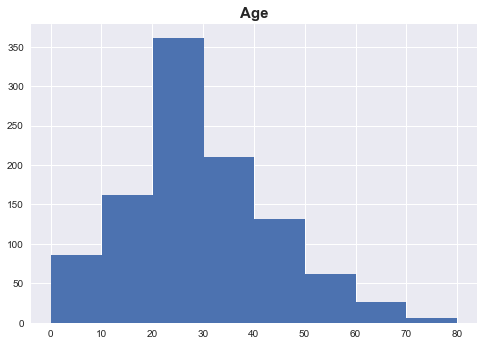

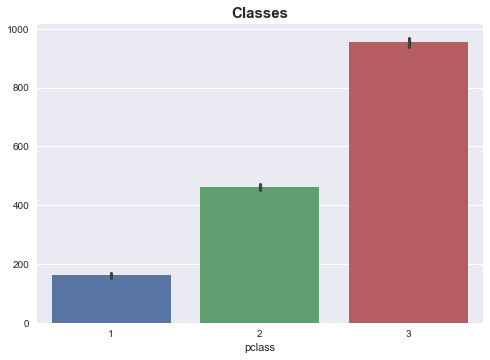

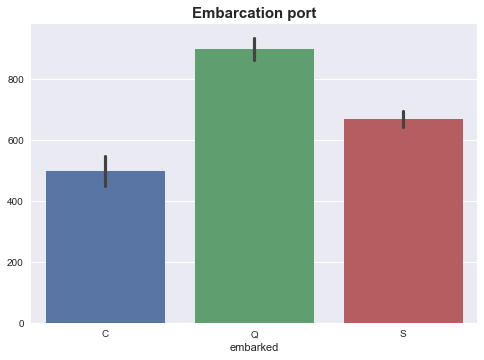

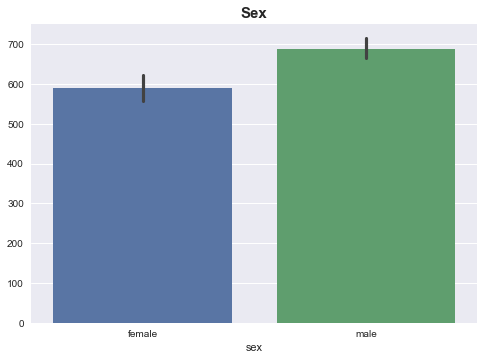

In [220]:
fig, ax = plt.subplots()
ax.set_title('Age', fontsize=15, fontweight='bold')
ax.hist(df.age.dropna(), label='Age', bins=8)
nice_bar_plot('Classes', df.pclass)
nice_bar_plot('Embarcation port', df.embarked)
nice_bar_plot('Sex', df.sex)

#### 3. Passenger distribution by cabin floor

([<matplotlib.patches.Wedge at 0x26ec6bd52b0>,
  <matplotlib.text.Text at 0x26ec6c000f0>])

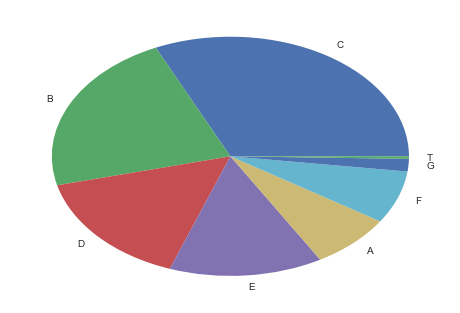

In [218]:
pie_data = df['deck'].value_counts().drop('?')
plt.pie(pie_data, labels=pie_data.index.values)

#### 4.1. Survival rate of first class passengers

([<matplotlib.patches.Wedge at 0x26ec824aef0>,
  <matplotlib.text.Text at 0x26ec82562e8>])

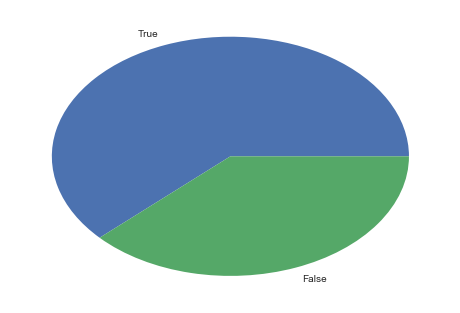

In [221]:
pie_class1 = df[df.pclass == 1]['survived'].value_counts()
plt.pie(pie_class1, labels = pie_class1.index.values)

#### 4.2. Survival rate of second class passengers

([<matplotlib.patches.Wedge at 0x26ec833d358>,
  <matplotlib.text.Text at 0x26ec8345710>])

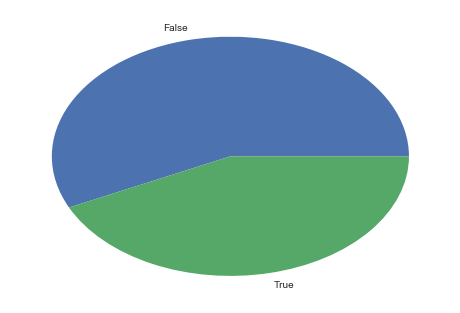

In [223]:
pie_class2 = df[df.pclass == 2]['survived'].value_counts()
plt.pie(pie_class2, labels = pie_class2.index.values)

#### 4.3. Survival rate of third class passengers

([<matplotlib.patches.Wedge at 0x11e9b9c18>,
  <matplotlib.text.Text at 0x11e9c3fd0>])

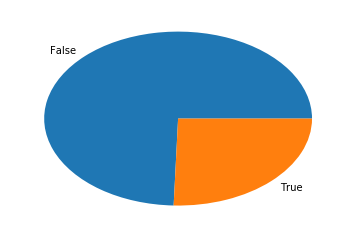

In [48]:
pie_class3 = df[df.pclass.isin([3])]['survived'].value_counts()
plt.pie(pie_class3, labels = pie_class3.index.values)

Calculate the proportion of the passengers that survived by travel class and sex. Present your results in a single histogram.

In [249]:
df_intsurv = df[['survived']].copy()
df_intsurv['survived'] = df_intsurv.survived.astype('int')
class_sex_grouped = df_intsurv.groupby([df.pclass, df.sex])
class_sex_grouped.mean()

survived
pclass sex             
1      female  0.965278
       male    0.340782
2      female  0.886792
       male    0.146199
3      female  0.490741
       male    0.152130

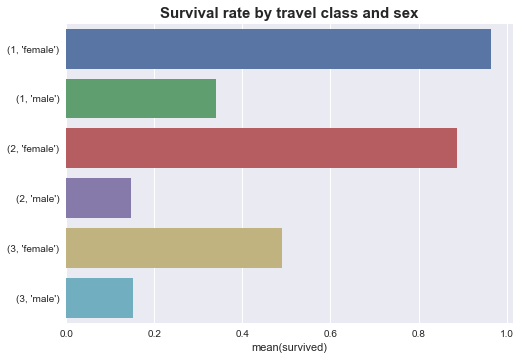

In [257]:
nice_bar_plot('Survival rate by travel class and sex', class_sex_grouped.mean().survived)